#### **Problem Statement:**

(1) the train_dataset where the observed values of the Site EUI for each row are provided and
(2) the x_test dataset the observed values of the Site EUI for each row are removed and provided separately in y_test. Your task is to predict the Site EUI for each row (using the complete training dataset), given the characteristics of the building and the weather data for the location of the building. Use the test sets for validation and testing. 

The target variable is **`site\_eui`** and the evaluation metric is **`RMSE`** score.




#### About Dataset:

According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition was responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. 

The dataset consists of building characteristics, weather data for the location of the building, as well as the energy usage for the building, and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to a single building observed in a given year.


#### **Sources of Dataset:**

https://www.kaggle.com/c/widsdatathon2022/data

#### Importing Required Libraries 

In [1]:
# for handling the data
import pandas as pd
import numpy as np

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# for presentation
import warnings
warnings.filterwarnings('ignore')

In [2]:
Train_df = pd.read_csv('train_dataset.csv')
X_test_df = pd.read_csv('x_test.csv')
Y_test_df = pd.read_csv('y_test.csv')

# Exploratory Data Analysis

In [3]:
Train_df.head() # to display the first 5 rows of dataset

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
X_test_df.head() # to display the first 5 rows of dataset

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [5]:
Y_test_df.head()

,id,site_eui
0,75757,166.588554
1,75758,259.381565
2,75759,158.537090
3,75760,261.441520
4,75761,242.967711


### Checking the basic information of dataset

In [6]:
Train_df.info() # loading train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
## Checking the is there null value available in the train dataset

In [8]:
Train_df.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [9]:
Train_df.isnull().sum().sort_values(ascending=False).head(10)

days_with_fog                45796
direction_peak_wind_speed    41811
max_wind_speed               41082
direction_max_wind_speed     41082
energy_star_rating           26709
year_built                    1837
Year_Factor                      0
november_max_temp                0
cooling_degree_days              0
december_max_temp                0
dtype: int64

In [10]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [11]:
X_test_df.isnull().sum()

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64

In [12]:
X_test_df.isnull().sum().sort_values(ascending=False).head(10)

days_with_fog                9117
max_wind_speed               8575
direction_peak_wind_speed    8575
direction_max_wind_speed     8575
energy_star_rating           2254
year_built                     92
Year_Factor                     0
november_max_temp               0
cooling_degree_days             0
december_max_temp               0
dtype: int64

In [13]:
Y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9705 non-null   int64  
 1   site_eui  9705 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.8 KB


#### Observation:

<u><b>Train Dataset</b></u>

1. The dataset has 75756 rows ans 64 columns
2. Dataset has 61 numeric and 3 object columns
3. Numeric columns are consist of both integer and float data type
4. There are 6 columns that have null values: days_with_fog, direction_peak_wind_speed, max_wind_speed, direction_max_wind_speed, energy_star_rating and year_built

<u><b>X_Test_Dataset</b></u>
1. The dataset has 9705 rows and 63 columns
2. Dataset has 60 numeric and 3 object columns
3. Numeric columns are consist of both integer and float data type
4. There are 6 columns that have null values: days_with_fog, direction_peak_wind_speed, max_wind_speed, direction_max_wind_speed, energy_star_rating and year_built (similar to the train dataset)

<u><b>Y_Test_Dataset</b></u>

1. The dataset has 9075 rows and 2 columns
2. The dataset has the same number of rows to the x_test dataset
3. Columns are id and site_eui which are both numeric values.
4. The column site_eui is the target value
5. There are no missing values in the dataset.

#### Now checking the Unique Values of data set

In [14]:
# for Train Dataset

for col in Train_df:
    print("---**"+col+"**---")
    print(Train_df[col].unique())

---**Year_Factor**---
[1 2 3 4 5 6]
---**State_Factor**---
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
---**building_class**---
['Commercial' 'Residential']
---**facility_type**---
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_servi

[  0   1 119  12   5  30   2  29  20  32  34  43   7  11  24   3  18   9
  13   8  95  14  17  26  28  31  42  48  21  15  16 115  10 117  36  45
  27  22  39  37]
---**days_above_110F**---
[ 0 16  1  8  5  2  3 10 15]
---**direction_max_wind_speed**---
[  1.  nan 270. 360. 300. 320. 330. 340. 280. 310. 350.]
---**direction_peak_wind_speed**---
[  1.  nan 270. 320. 340. 360. 330. 310. 350.]
---**max_wind_speed**---
[ 1.   nan 12.5 10.7 13.4 21.5 16.5 19.7 17.9 17.4 15.7 17.  20.6 19.2
 18.3 13.  23.3]
---**days_with_fog**---
[ nan  12.  89.  88.  90. 104. 113. 184. 126. 107.  82.  84. 120. 178.
 156. 110. 106. 311.  86.  37. 289. 176.  58. 267.  73. 161.  99.  93.
 114.  79.  56.  63. 101. 111. 148. 131.  65.  87.  31. 125. 116.  51.
 261.]
---**site_eui**---
[248.6826155   26.50014971  24.69361928 ...  48.40439776 592.0227504
  29.15468446]
---**id**---
[    0     1     2 ... 75754 75755 75756]


#### Descriptive Statistics

In [15]:
Train_df.describe(include='all')

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,75757,75757,75757,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
unique,NaN,7,2,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,State_6,Residential,Multifamily_Uncategorized,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50840,43558,39455,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.367755,NaN,NaN,NaN,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,NaN,NaN,NaN,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,NaN,NaN,NaN,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,NaN,NaN,NaN,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,NaN,NaN,NaN,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,NaN,NaN,NaN,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000


In [16]:
Train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [17]:
X_test_df.describe(include='all')

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9705,9705,9705,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
unique,NaN,6,2,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,State_11,Commercial,Multifamily_Uncategorized,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3268,5607,2199,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.0,NaN,NaN,NaN,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,NaN,NaN,NaN,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,NaN,NaN,NaN,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,NaN,NaN,NaN,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,NaN,NaN,NaN,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,NaN,NaN,NaN,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000


In [18]:
X_test_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [19]:
Y_test_df.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,71.294284
std,2801.736515,60.133602
min,75757.000000,-0.136703
25%,78183.000000,36.751719
50%,80609.000000,60.029687
75%,83035.000000,84.619743
max,85461.000000,892.420387


#### Combine the dataset for data visualization

In [20]:
Test_df=X_test_df.copy()

In [21]:
Test_df['site_eui']=Y_test_df['site_eui']
Test_df['Dataset']='Test'
Train_df['Dataset']='Train'

df_all = pd.concat([Train_df,Test_df], axis=0, ignore_index=True)
df_all


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,Dataset
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.50000,...,0,0,0,1.0,1.0,1.0,NaN,248.682615,0,Train
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.50000,...,0,0,0,1.0,NaN,1.0,12.0,26.500150,1,Train
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.50000,...,0,0,0,1.0,NaN,1.0,12.0,24.693619,2,Train
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.50000,...,0,0,0,1.0,NaN,1.0,12.0,48.406926,3,Train
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.50000,...,0,0,0,1.0,1.0,1.0,NaN,3.899395,4,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7,State_11,Residential,5plus_Unit_Building,305925.0,2013.0,99.0,812.0,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,23.677329,85457,Test
85458,7,State_11,Residential,5plus_Unit_Building,34909.0,1910.0,94.0,26.5,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,20.512284,85458,Test
85459,7,State_11,Residential,5plus_Unit_Building,42393.0,2014.0,94.0,812.0,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,39.285975,85459,Test
85460,7,State_11,Residential,5plus_Unit_Building,25368.0,1992.0,79.0,812.0,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,29.529438,85460,Test


### Comparing train and test data

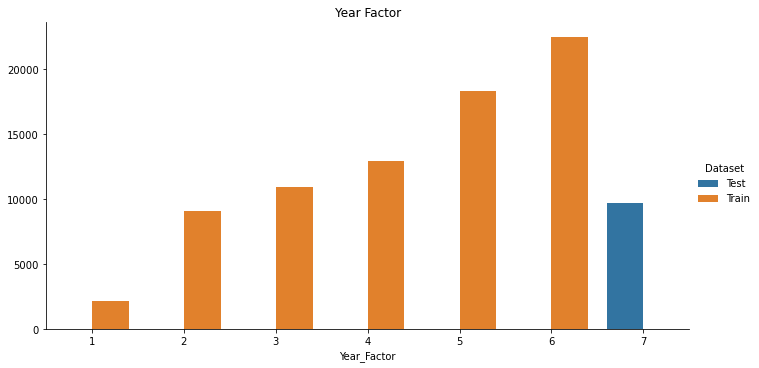

In [22]:
Z = sns.catplot(x='Year_Factor',y='id', data=df_all.groupby(['Dataset','Year_Factor']).agg({'id':'count'}).reset_index(),
                 hue='Dataset',
                 kind='bar',
                 aspect=2,
                 height=5)\
.set(title="Year Factor",
     ylabel=None)

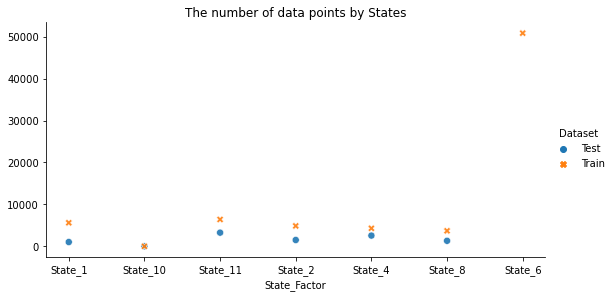

In [23]:
Z = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=df_all.groupby(['Dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='Dataset',
                 style='Dataset',
                 aspect=2,
                 height=4,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by States",
    ylabel=None)


<u><b>Observation</b></u>

- State 6 data is not present in testing dataset
- Only year factor 7 is present in testing dataset, but it is not present in training dataset


##### <b>Univariate Analysis</b>

Text(0.5, 0.98, 'Distribution of Site EUI')

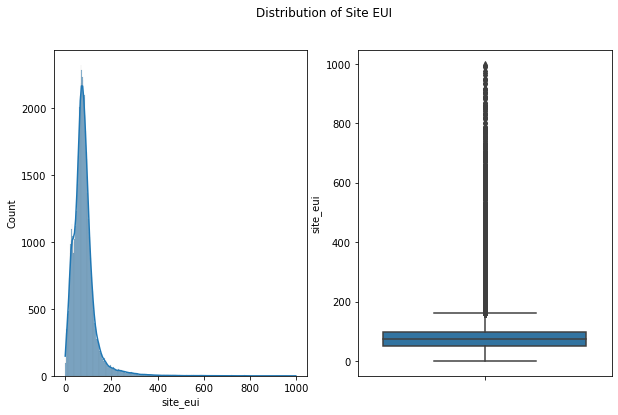

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df_all, kde=True, x='site_eui')
plt.subplot(1,2,2)
sns.boxplot(data=df_all, y='site_eui')
plt.suptitle('Distribution of Site EUI')

<b><u>Observation</u></b>


The target variable is skewed to the right. In training data, most of energy intensity falls between the range 80 to 90.

Text(0.5, 1.0, 'State Frequency')

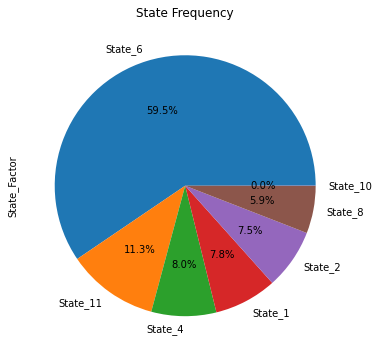

In [25]:
plt.figure(figsize=(18,6))
df_all['State_Factor'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("State Frequency")

<u><b>Insights</b></u>

State 6 is the most frequent state in the dataset.


### Bivariate Analysis

#### Compare Target vs the Categorical feature

Text(0.5, 0.98, 'State Factor vs Site EUI')

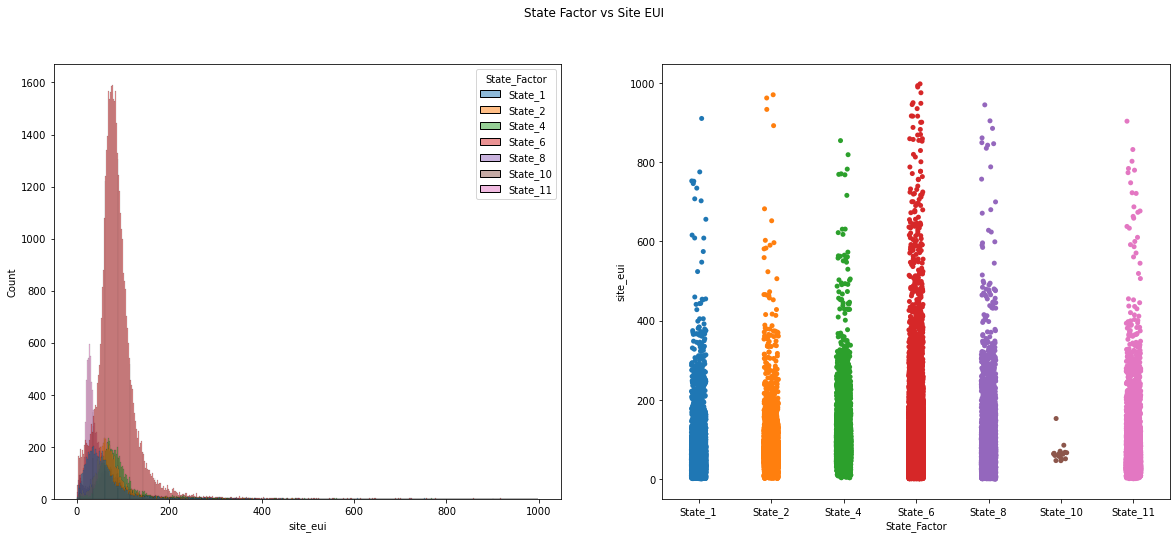

In [26]:
# Site EUI vs State Factor
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(data=df_all, x='site_eui', hue='State_Factor')
plt.subplot(1,2,2)
sns.stripplot(data=df_all, y='site_eui', x='State_Factor')
plt.suptitle('State Factor vs Site EUI')

<u><b>Insights</u></b>

The largest at least energy site usage are state 6 & 10 resp.

[Text(0.5, 1.0, 'Site EUI vs building class')]

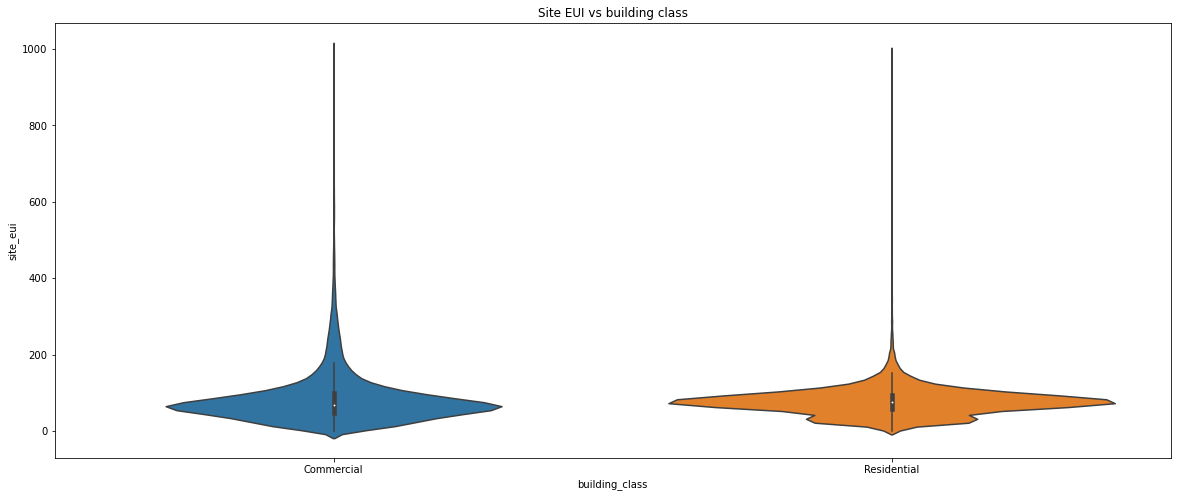

In [27]:
# Site EUI vs Building Class 
plt.figure(figsize=(20,8))
sns.violinplot(data=df_all, y='site_eui', x='building_class').set(title='Site EUI vs building class')

<b>Observation:</b>


Residential has the highest number of building class in the dataset.
But in term of site eui, commercial has the highest energy usage (arround 500)

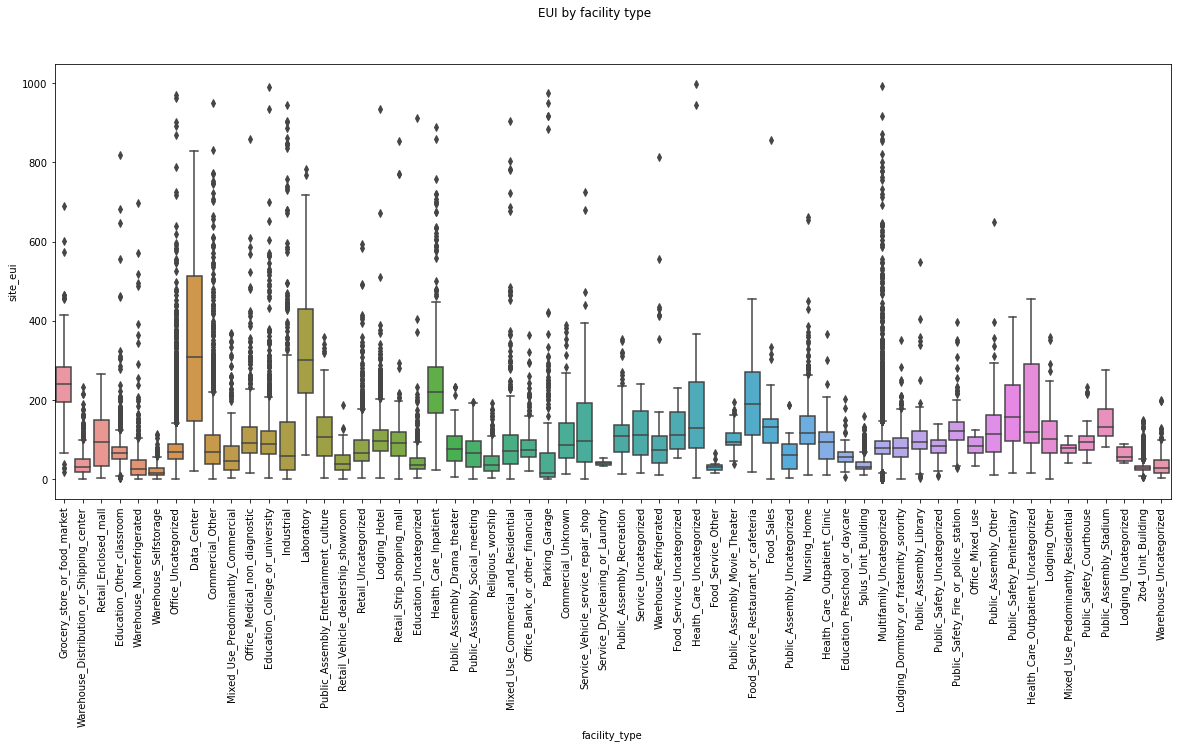

In [28]:
# Site vs Facility type
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df_all, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

#### Compare Numerical Values vs Target Variable

[Text(0.5, 1.0, 'Site EUI vs Year Factor')]

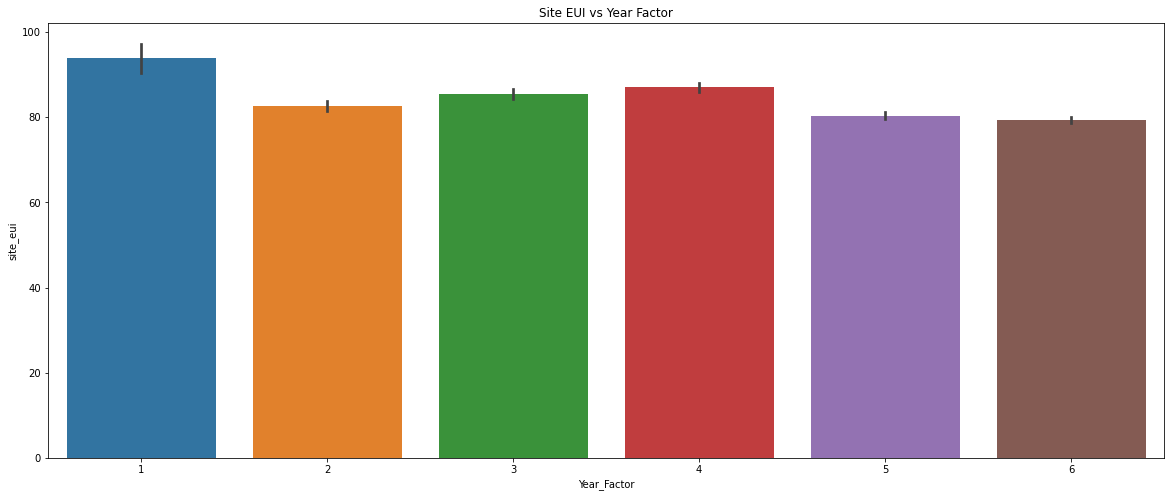

In [29]:
# Year Factor vs Site EUI
plt.figure(figsize=(20,8))
sns.barplot(data=Train_df, y='site_eui', x='Year_Factor').set(title='Site EUI vs Year Factor')

## Observation :

1. Training data consists of 6 years factor while test data only consists year factor 7.

2. Year factor 1 has the greatest value of site_eui


Text(0.5, 1.0, 'Site EUI vs Energy Star Rating')

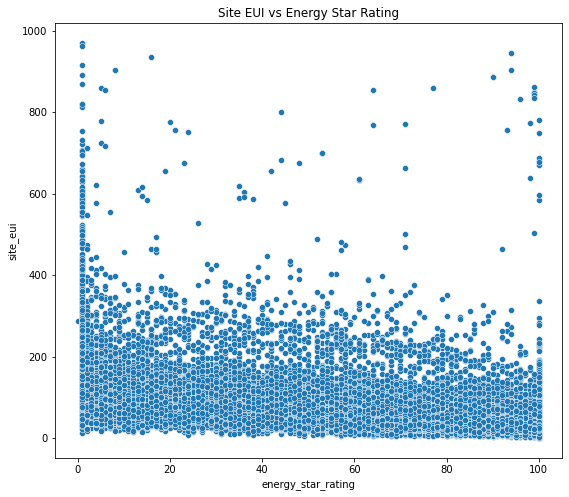

In [30]:
#Energy_star_rating vs site_eui
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=df_all, y='site_eui', x='energy_star_rating')
plt.title('Site EUI vs Energy Star Rating')

Text(0.5, 1.0, 'Average Site EUI vs Energy Star Rating')

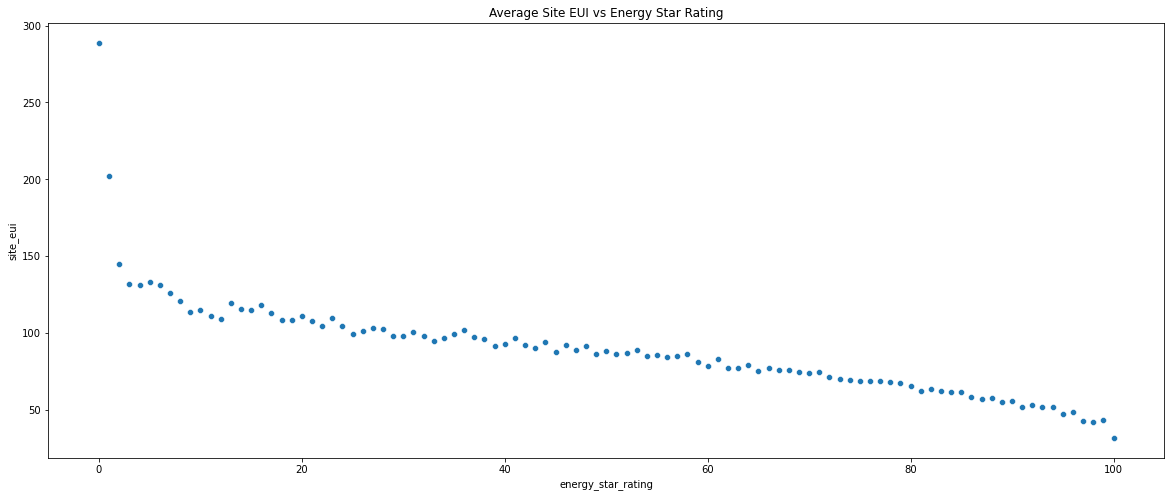

In [31]:
mean = df_all.groupby("energy_star_rating")["site_eui"].agg('mean').reset_index()

plt.figure(figsize=(20,8))
sns.scatterplot(data=mean, y='site_eui', x='energy_star_rating')
plt.title('Average Site EUI vs Energy Star Rating')

Text(0.5, 1.0, 'Site EUI vs Elevation')

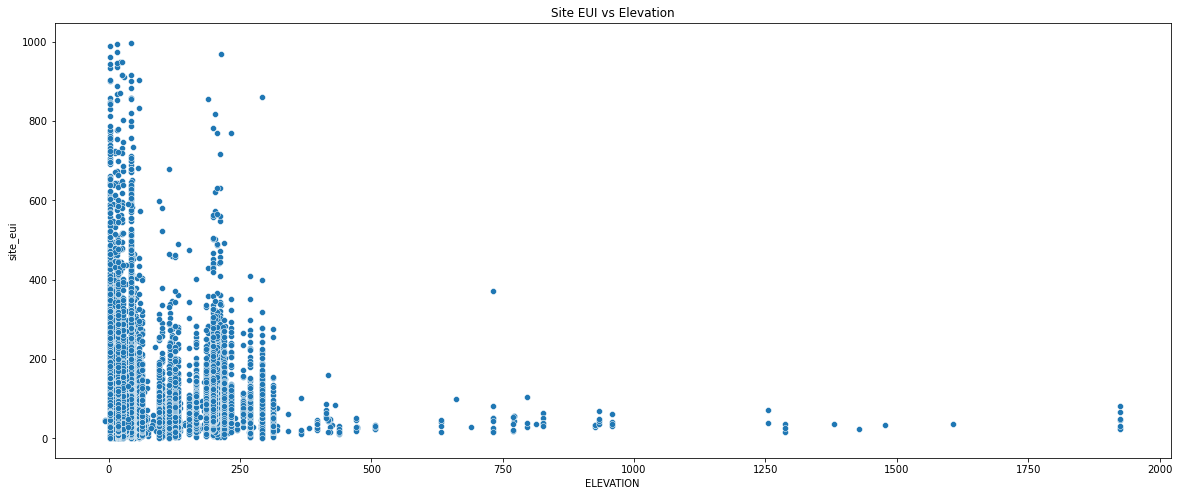

In [32]:
#Elevation vs site_eui
plt.figure(figsize=(20,8))
sns.scatterplot(data=Train_df, y='site_eui', x='ELEVATION')
plt.title('Site EUI vs Elevation')

Text(0.5, 1.0, 'Site EUI vs Floor Area')

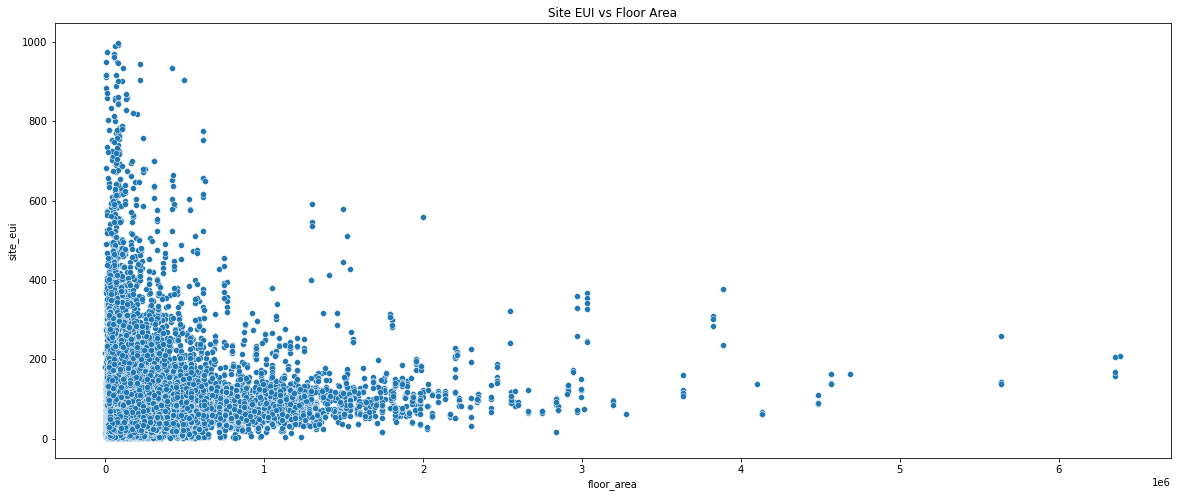

In [33]:
# floor_area vs site eui
plt.figure(figsize=(20,8)) 
sns.scatterplot(data=Train_df, y='site_eui', x='floor_area')
plt.title('Site EUI vs Floor Area')

**Insights:**

* The lower the floor area of the building, the higher the site eui 

In [34]:
min(df_all['year_built'].values)

0.0

**Insights:**

* The lowest year value in the dataset is zero, it should be removed later since it is impossible to have a recorded zero year

Text(0.5, 1.0, 'Site EUI vs Year Built')

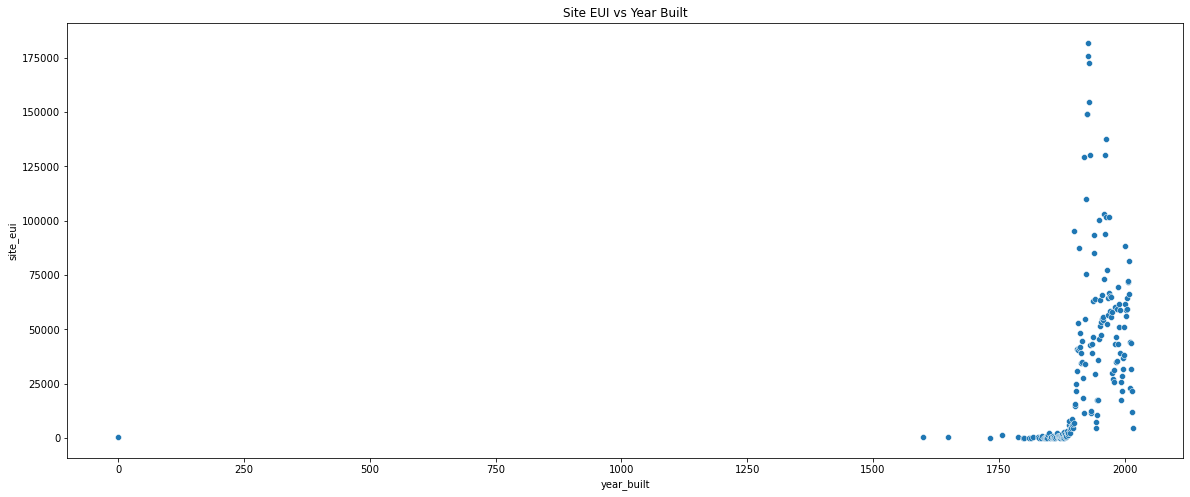

In [35]:
# year_built and site_eui
sum_val = df_all.groupby("year_built")["site_eui"].agg('sum').reset_index()

plt.figure(figsize=(20,8))
sns.scatterplot(data=sum_val, x='year_built', y='site_eui')
plt.title('Site EUI vs Year Built')

* Site eui of buildings are lower during the 21st century as compared to the previous century

Text(0.5, 1.0, 'Site EUI vs Year Built')

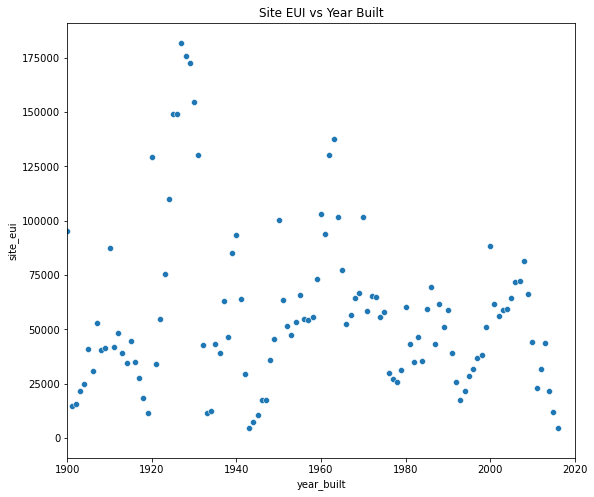

In [36]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=sum_val, x='year_built', y='site_eui')
plt.xlim(1900,2020)
plt.title('Site EUI vs Year Built')

Insights:

- Site eui of buildings are lower during the 21st century as compared to the previous century

Text(0.5, 1.0, 'Site EUI vs Average Temperature')

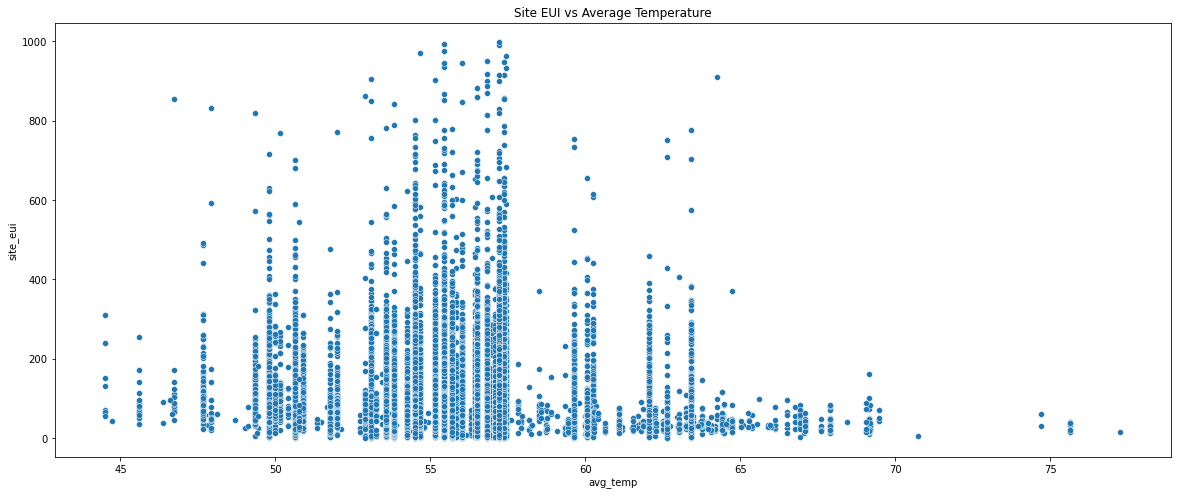

In [37]:
#average temperature and site_eui
plt.figure(figsize=(20,8))
sns.scatterplot(data=Train_df, y='site_eui', x='avg_temp')
plt.title('Site EUI vs Average Temperature')

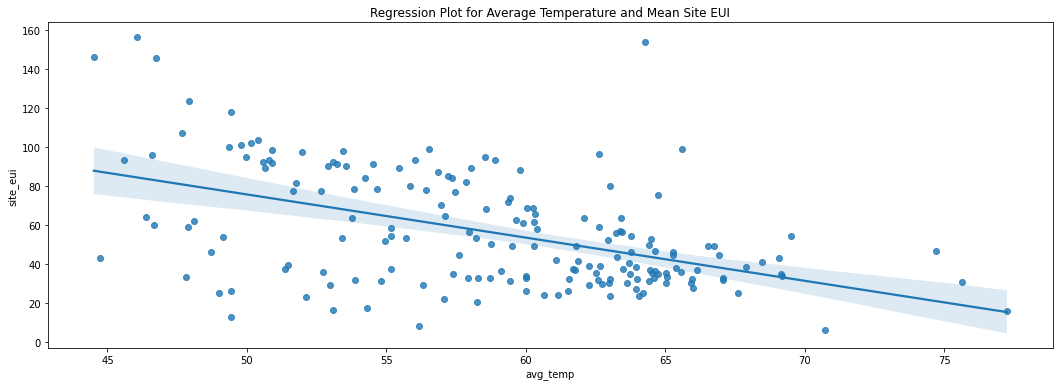

In [38]:
plt.figure(figsize=(18, 6))
df = pd.DataFrame(df_all.groupby('avg_temp')['site_eui'].agg('mean')).reset_index()
sns.regplot(data=df, x='avg_temp', y='site_eui')
plt.title('Regression Plot for Average Temperature and Mean Site EUI')
plt.show()

* The higher the average temperature value, the lower the site_eui value

In [39]:
degree_days = df_all.groupby('State_Factor').agg({'cooling_degree_days': 'mean', 
                                              'heating_degree_days': 'mean', 
                                              'site_eui': 'mean'}).reset_index()

Text(0.5, 1.0, 'Site EUI vs Cooling Degree Days')

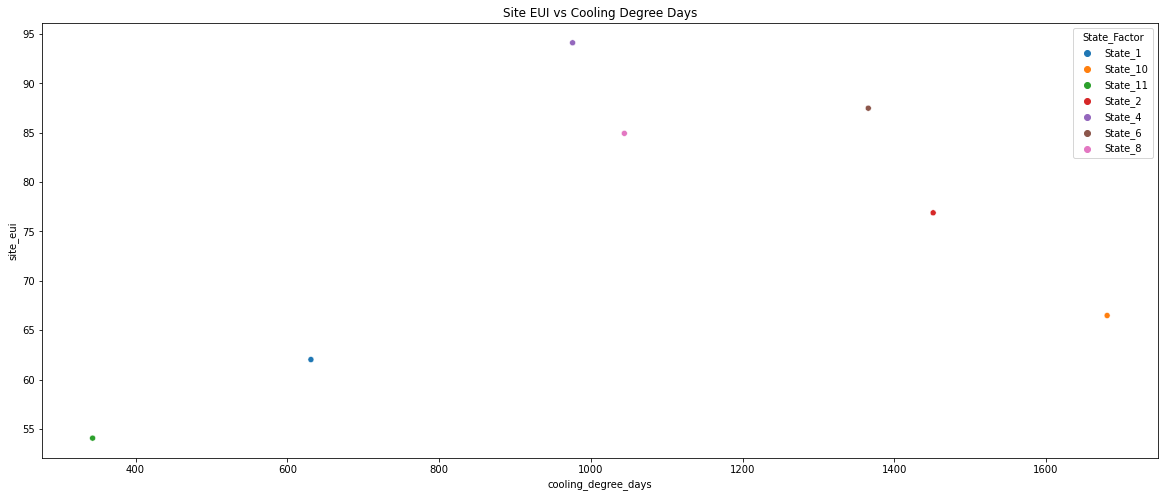

In [40]:
#cooling/heating degree vs site_eui
plt.figure(figsize=(20,8))
sns.scatterplot(data=degree_days, y='site_eui', x='cooling_degree_days', hue='State_Factor')
plt.title('Site EUI vs Cooling Degree Days')

* State 11 has the lowest state eui for both cooling and heating degree days

In [41]:
rating_site_eui = df_all.groupby('State_Factor').agg({'energy_star_rating': 'mean', 
                                              'site_eui': 'mean'}).reset_index()

Text(0.5, 1.0, 'Site EUI vs Heating Days')

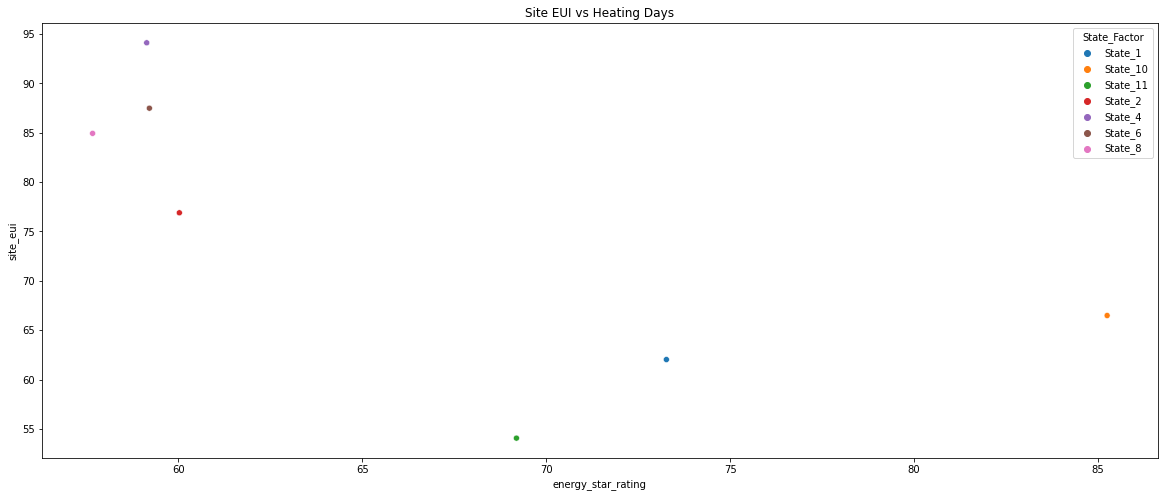

In [42]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=rating_site_eui, y='site_eui', x='energy_star_rating', hue='State_Factor')
plt.title('Site EUI vs Heating Days')

* Even though state 4 has the highest site_eui value, it does not have the highest energy start rating
* State 10 has the highest energy start rating among the US states

In [43]:
# List all numeric attributes
num_values = list(df_all.select_dtypes(include=[np.number]).columns)

In [44]:
def plot_corr(df,figsize):
    # Create the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle 
    mask = np.triu(np.ones_like(corr, dtype=bool))


    # Add the mask to the heatmap
    plt.figure(figsize=(figsize))
    sns.set(font_scale=1)
    sns.heatmap(corr, mask=mask, cmap = sns.color_palette("Spectral"), center=0, linewidths=1, fmt=".2f", annot=True)

    plt.title('Correlation between numerical features')
    plt.show()

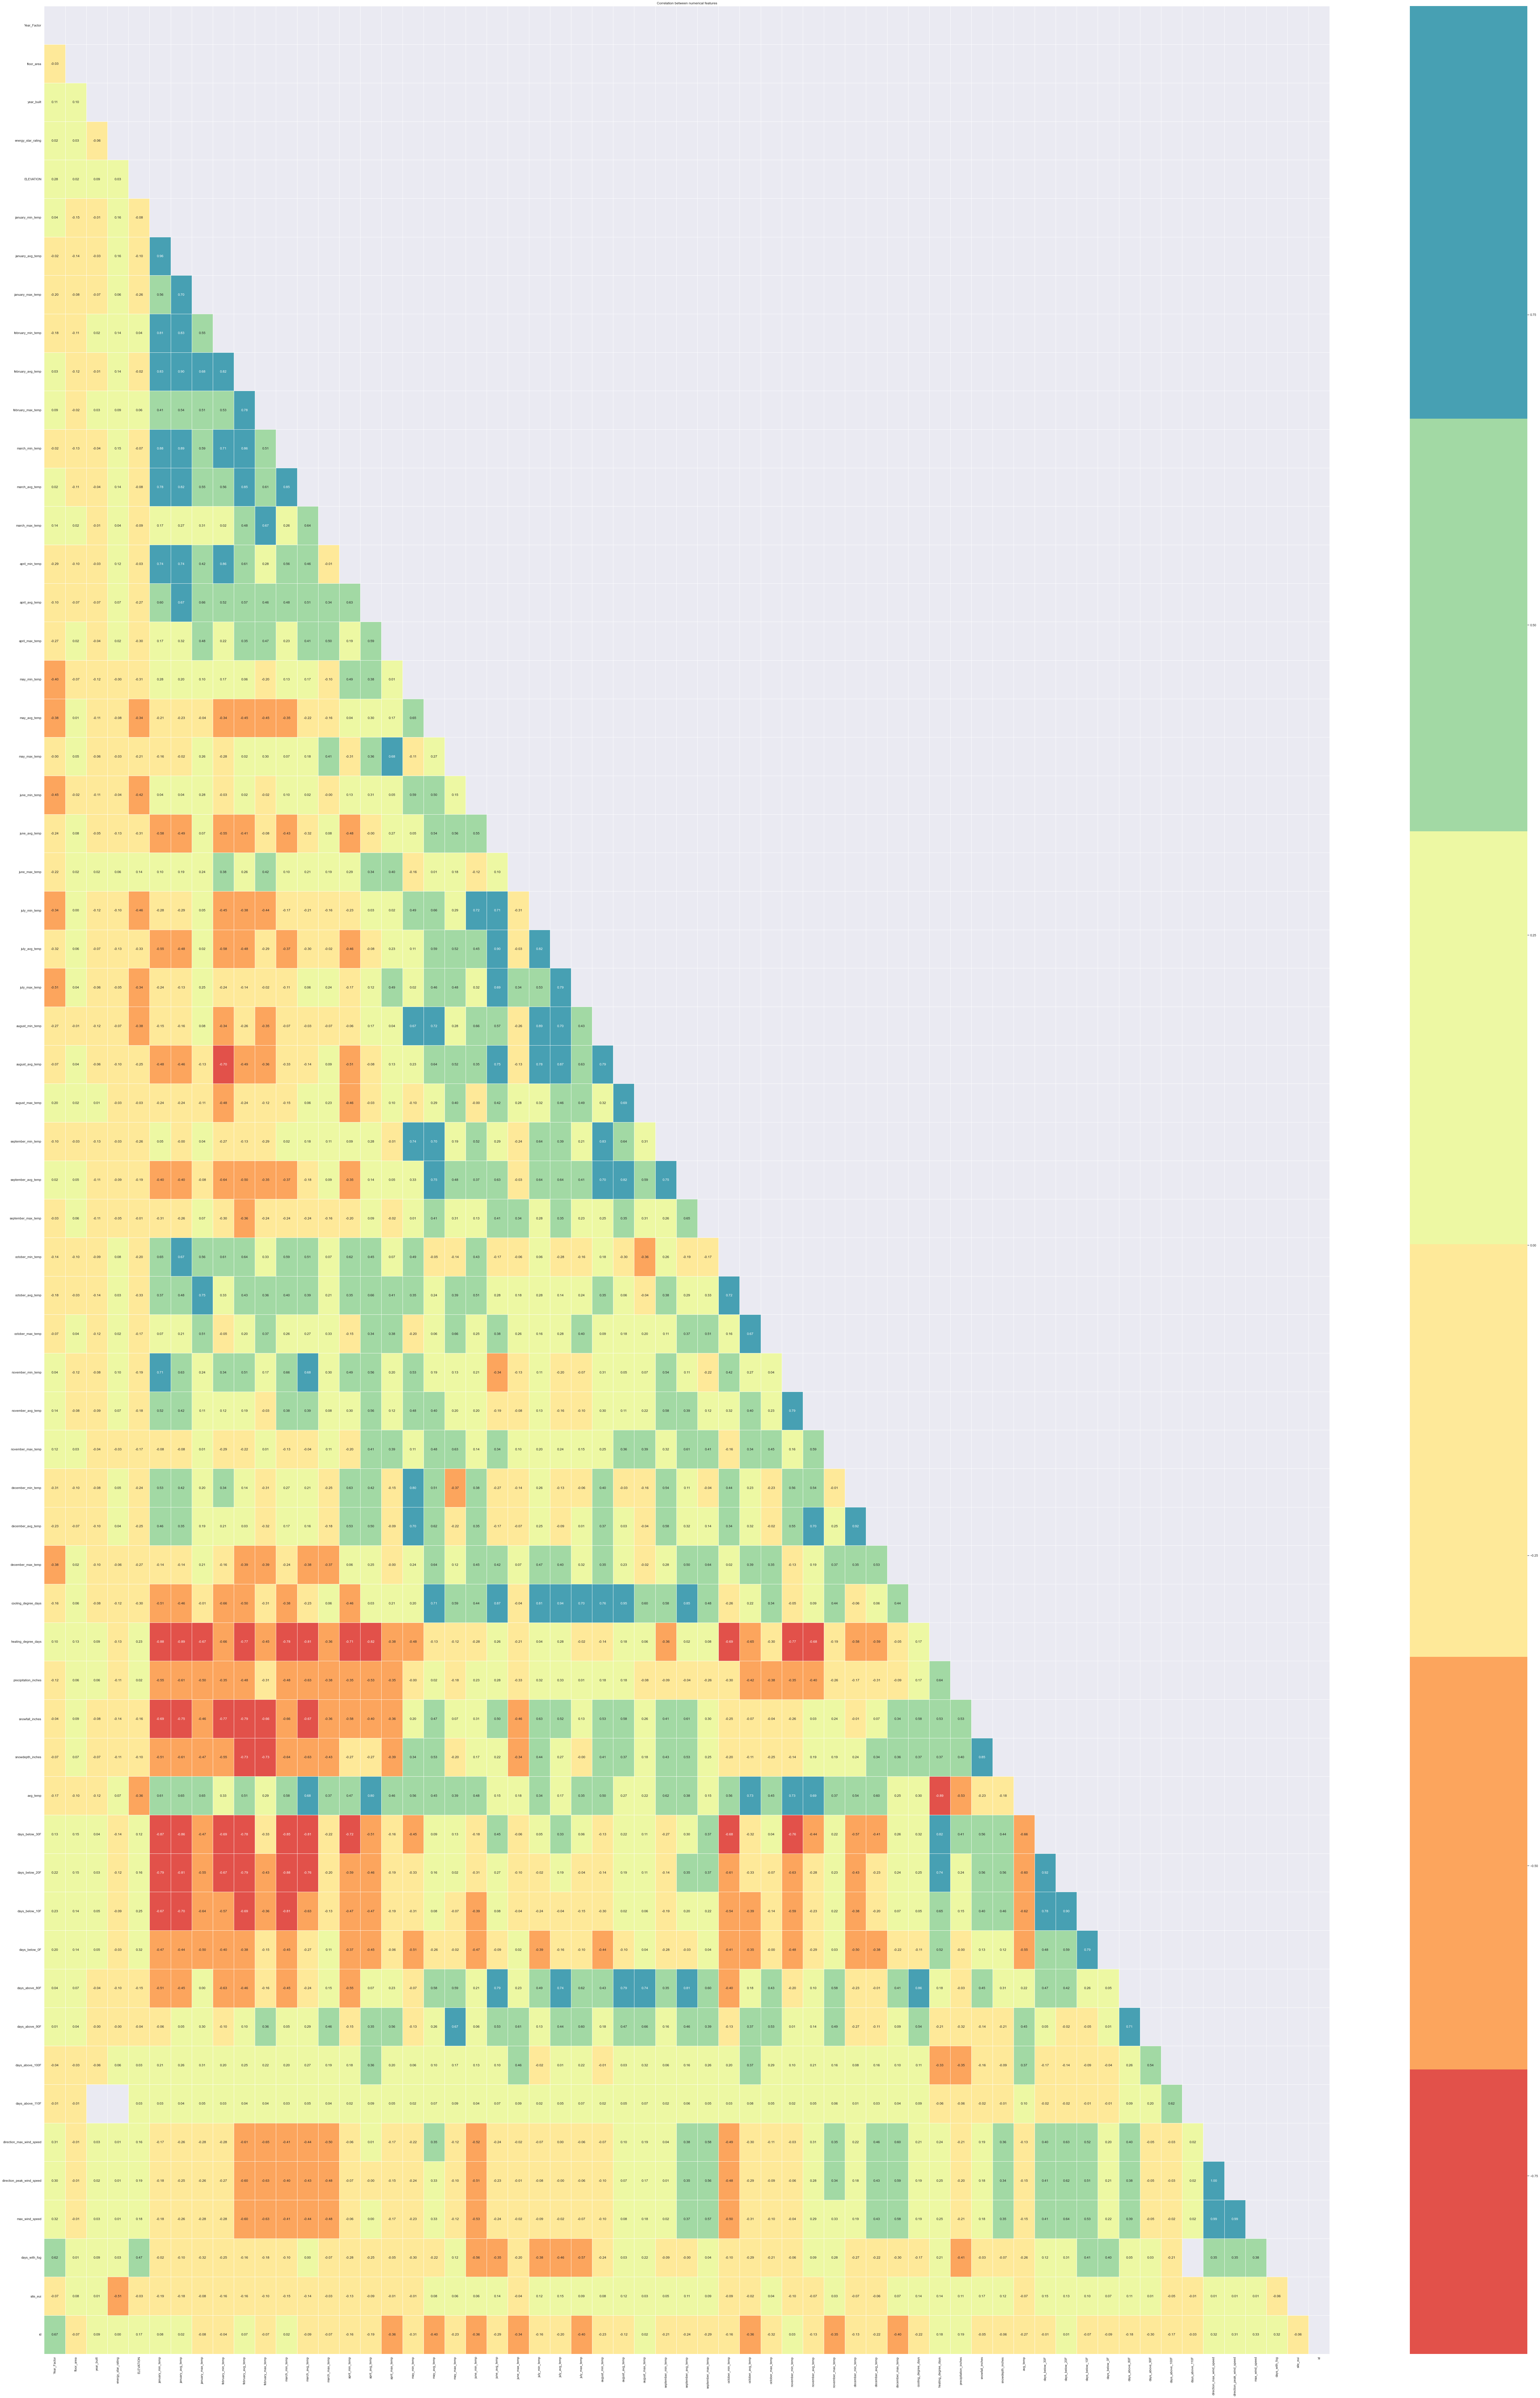

In [45]:
figsize = (100,150)
plot_corr(df_all[num_values], figsize)

In [46]:
# Removing the temperature of each month
num_values_2 = ['Year_Factor',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog',
 'site_eui']

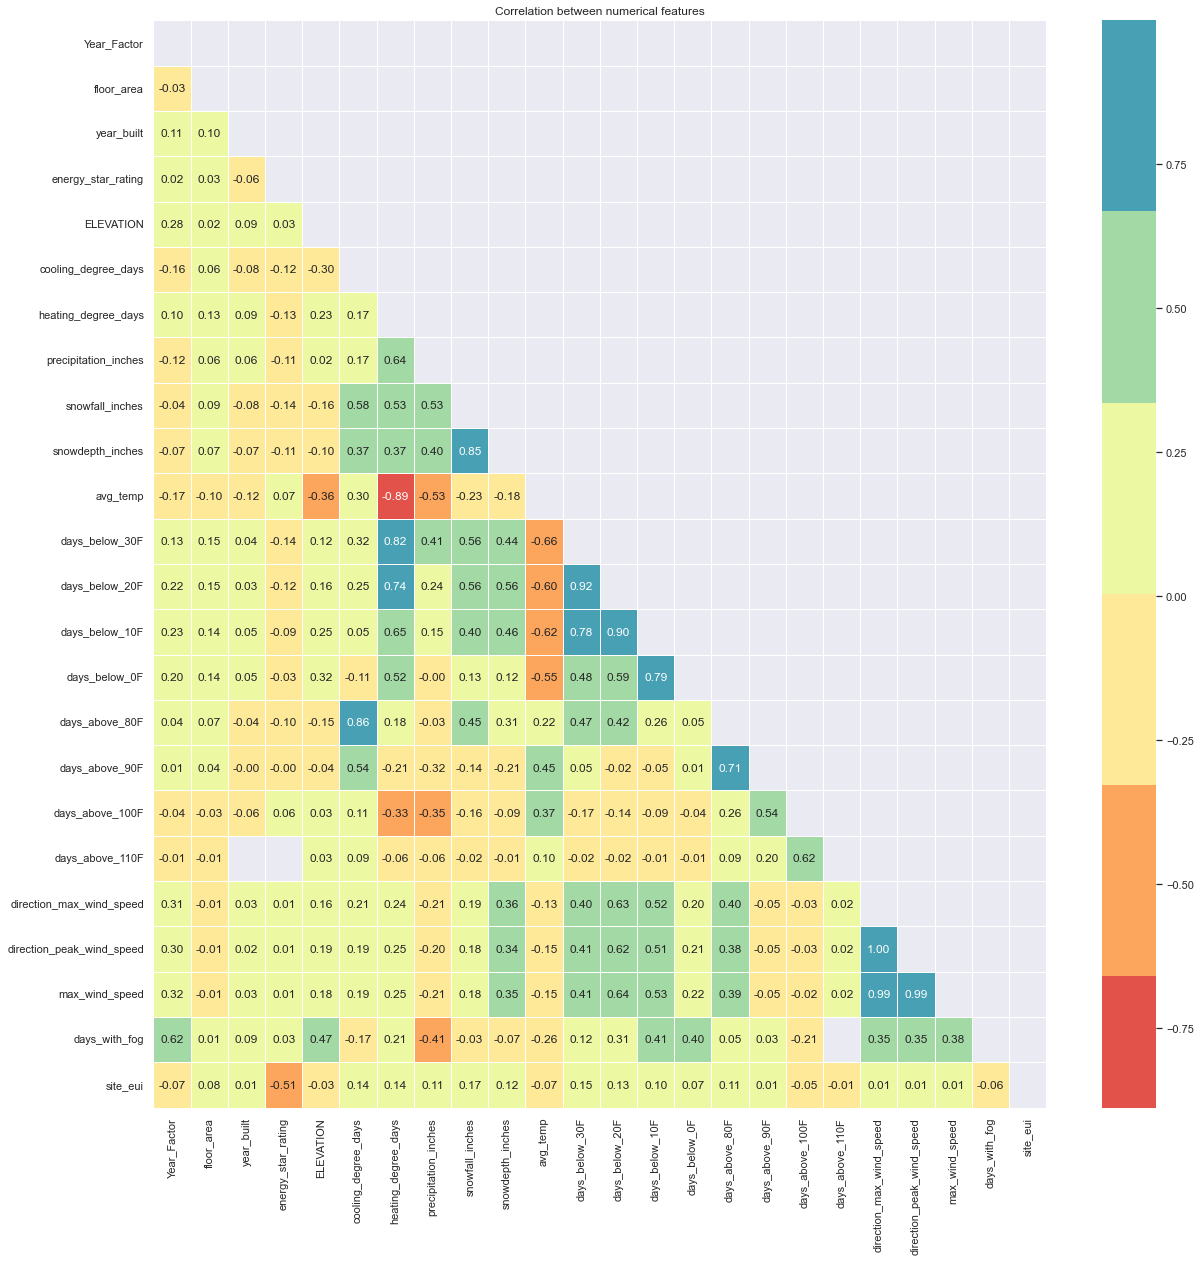

In [47]:
plot_corr(df_all[num_values_2], figsize=(20,20))

* The lower the energy star rating, the higher it will consume energy
* The larger the surface are of a building, the higher it will consume energy.
* The higher the elevation of a building, the higher it will consume energy.
* During high temperature (90 and above), the energy consumption is low, while at low temperature (0 to 80F), the energy consumption is high. 



# DATA PREPROCESSING

**Based on the result during EDA, the following task/ things need sto perform (data preprocessing**


1. Check then dropped duplicates
2. Evaluation of the missing values (To see whether to impute or drop)
3. Encoding of the object columns
4. Feature Engineering
5. Check for the skewness of the dataset
6. Check for the correlation and multicollinearity

**Checking duplicate values**

In [48]:
print('Duplicate values:', df_all.duplicated().sum())

Duplicate values: 0


In [49]:
df_all.isnull().sum()[df_all.isnull().sum()!=0] / len(df_all) * 100

year_built                    2.257144
energy_star_rating           33.889916
direction_max_wind_speed     58.104187
direction_peak_wind_speed    58.957197
max_wind_speed               58.104187
days_with_fog                64.254288
dtype: float64

In [50]:
df_all['year_built'].unique()                 

array([1942., 1955., 1951., 1980., 1985., 1956., 1982., 1947., 1929.,
       1979., 1927., 1960., 1924.,   nan, 1949., 1926., 1914., 1973.,
       1900., 1913., 1962., 1989., 1967., 1954., 1986., 1906., 1912.,
       1902., 1920., 1905., 1997., 1909., 2002., 1974., 1907., 1908.,
       1988., 1987., 1923., 1948., 1966., 1975., 1934., 1938., 1983.,
       2003., 1915., 1961., 1911., 1925., 1964., 1953., 1957., 2006.,
       1990., 1991., 1969., 1968., 1910., 1937., 1971., 1965., 1946.,
       1917., 1901., 2000., 2008., 1999., 1981., 2001., 1978., 1898.,
       1928., 1970., 1918., 1930., 1903., 1936., 1921., 1922., 1984.,
       1976., 1952., 1959., 1916., 1963., 1972., 1919., 1931., 1958.,
          0., 1994., 1940., 2010., 2009., 1889., 1939., 1945., 1904.,
       1932., 1941., 1977., 1993., 1992., 1950., 1944., 1935., 1996.,
       1995., 1933., 1943., 2007., 2005., 2004., 1869., 2011., 2012.,
       1864., 1998., 1895., 1896., 1875., 1880., 1888., 1897., 1891.,
       2013., 1887.,

**Imputation of Missing values**

The nan and zero needs to be impute and replace, respectively

In [51]:
df_all['year_built'].replace(0, np.nan, inplace=True)

### Null values will be imputated Using KNN Imputer method

In [52]:
# For preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [53]:
columns = ['year_built','energy_star_rating',
       'direction_max_wind_speed',
       'direction_peak_wind_speed',
       'max_wind_speed','days_with_fog']

#train_knn = df_all.copy(deep=True)
knn = KNNImputer(n_neighbors=2, weights="uniform")

for i in columns:
    df_all[i] = knn.fit_transform(df_all[[i]])
    print('---'+i+'---')
    print(df_all[i].unique())

---year_built---
[1942.         1955.         1951.         1980.         1985.
 1956.         1982.         1947.         1929.         1979.
 1927.         1960.         1924.         1953.72633671 1949.
 1926.         1914.         1973.         1900.         1913.
 1962.         1989.         1967.         1954.         1986.
 1906.         1912.         1902.         1920.         1905.
 1997.         1909.         2002.         1974.         1907.
 1908.         1988.         1987.         1923.         1948.
 1966.         1975.         1934.         1938.         1983.
 2003.         1915.         1961.         1911.         1925.
 1964.         1953.         1957.         2006.         1990.
 1991.         1969.         1968.         1910.         1937.
 1971.         1965.         1946.         1917.         1901.
 2000.         2008.         1999.         1981.         2001.
 1978.         1898.         1928.         1970.         1918.
 1930.         1903.         1936.    

**Encoding of object features**

In [54]:
Col = df_all.dtypes.loc[df_all.dtypes=='object']
Col = Col.index
Col = Col[:3]
Col

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')

In [55]:
for i in Col:
    print(i)
    print("---")
    print(df_all[i].unique())

State_Factor
---
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
building_class
---
['Commercial' 'Residential']
facility_type
---
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Pub

In [56]:
df_all.loc[df_all['facility_type'].str.contains('Public_Safety'), 'facility_type'] = 'Public_Safety'
df_all.loc[df_all['facility_type'].str.contains('Public_Assembly'), 'facility_type'] = 'Public_Assembly'
df_all.loc[df_all['facility_type'].str.contains('Food_'), 'facility_type'] = 'Food_Grocery'
df_all.loc[df_all['facility_type'].str.contains('Grocery_'), 'facility_type'] = 'Food_Grocery'
df_all.loc[df_all['facility_type'].str.contains('Retail_'), 'facility_type'] = 'Retail'
df_all.loc[df_all['facility_type'].str.contains('Health_Care'), 'facility_type'] = 'Health_Care'
df_all.loc[df_all['facility_type'].str.contains('Nursing_Home'), 'facility_type'] = 'Health_Care'
df_all.loc[df_all['facility_type'].str.contains('Warehouse'), 'facility_type'] = 'Warehouse'
df_all.loc[df_all['facility_type'].str.contains('Office'), 'facility_type'] = 'Office'
df_all.loc[df_all['facility_type'].str.contains('Commercial'), 'facility_type'] = 'Commercial'
df_all.loc[df_all['facility_type'].str.contains('Education'), 'facility_type'] = 'Education'
df_all.loc[df_all['facility_type'].str.contains('Service'), 'facility_type'] = 'Services'
df_all.loc[df_all['facility_type'].str.contains('Lodging_'), 'facility_type'] = 'Lodging'
df_all.loc[df_all['facility_type'].str.contains('Mixed_Use_Predominantly_Residential'), 'facility_type'] = 'Mixed_Use'
df_all.loc[df_all['facility_type'].str.contains('Multifamily_Uncategorized'), 'facility_type'] = 'Multifamily'
df_all.loc[df_all['facility_type'].str.contains('Unit_Building'), 'facility_type'] = 'Unit_Building'
df_all['facility_type'].unique()

array(['Food_Grocery', 'Warehouse', 'Retail', 'Education', 'Office',
       'Data_Center', 'Commercial', 'Industrial', 'Laboratory',
       'Public_Assembly', 'Lodging', 'Health_Care', 'Religious_worship',
       'Parking_Garage', 'Services', 'Unit_Building', 'Multifamily',
       'Public_Safety', 'Mixed_Use'], dtype=object)

In [57]:
for i in Col:
    Enc= LabelEncoder()
    #enc = TargetEncoder()
    df_all[i+'_Enc'] =Enc.fit_transform(df_all[i])
    #df_all[i+'_Enc'] = Enc.fit_transform(df_all[i],df_all['site_eui'])
    df_all.drop(columns=i, inplace=True)
df_all.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,Dataset,State_Factor_Enc,building_class_Enc,facility_type_Enc
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,1.0,1.000000,1.0,109.94301,248.682615,0,Train,0,0,3
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,1.0,70.750627,1.0,12.00000,26.500150,1,Train,0,0,18
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,1.0,70.750627,1.0,12.00000,24.693619,2,Train,0,0,15
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,1.0,70.750627,1.0,12.00000,48.406926,3,Train,0,0,2
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,1.0,1.000000,1.0,109.94301,3.899395,4,Train,0,0,18


**Feature Engineering**

In [58]:
# dropping id feature
df_all.drop(columns='id',inplace=True)

In [59]:
# Extracting and combining all temperature related columns
temp = df_all.loc[:, (df_all.columns.str.endswith('_temp'))].columns.unique()
temp

Index(['january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'avg_temp'],
      dtype='object')

In [60]:
df_all['min_temp'] =df_all[temp].min(axis=1)
df_all['max_temp'] =df_all[temp].max(axis=1)
df_all['avg_temp'] =df_all[temp].mean(axis=1)
df_all.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,Dataset,State_Factor_Enc,building_class_Enc,facility_type_Enc,min_temp,max_temp
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,1.000000,1.0,109.94301,248.682615,Train,0,0,3,35.0,90.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,70.750627,1.0,12.00000,26.500150,Train,0,0,18,35.0,90.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,70.750627,1.0,12.00000,24.693619,Train,0,0,15,35.0,90.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,70.750627,1.0,12.00000,48.406926,Train,0,0,2,35.0,90.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,1.000000,1.0,109.94301,3.899395,Train,0,0,18,35.0,90.0


In [61]:
spring_temp = df_all.loc[:, df_all.columns.str.startswith(('march','april','may'))].columns.unique()
summer_temp = df_all.loc[:, df_all.columns.str.startswith(('june','july','august'))].columns.unique()
fall_temp = df_all.loc[:, df_all.columns.str.startswith(('september','october','november'))].columns.unique()
winter_temp = df_all.loc[:, df_all.columns.str.startswith(('december','january','february'))].columns.unique()

In [62]:
# Spring
df_all['spring_avg_temp'] = df_all[spring_temp].mean(axis=1)
df_all['spring_min_temp'] = df_all[spring_temp].min(axis=1) 
df_all['spring_max_temp'] = df_all[spring_temp].max(axis=1) 
# Summer
df_all['summer_avg_temp'] = df_all[summer_temp].mean(axis=1)
df_all['summer_min_temp'] = df_all[summer_temp].min(axis=1) 
df_all['summer_max_temp'] = df_all[summer_temp].max(axis=1)
# Fall
df_all['fall_avg_temp'] = df_all[fall_temp].mean(axis=1)
df_all['fall_min_temp'] = df_all[fall_temp].min(axis=1) 
df_all['fall_max_temp'] = df_all[fall_temp].max(axis=1)
# Winter
df_all['winter_avg_temp'] = df_all[winter_temp].mean(axis=1)
df_all['winter_min_temp'] = df_all[winter_temp].min(axis=1) 
df_all['winter_max_temp'] = df_all[winter_temp].max(axis=1)

df_all.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,spring_max_temp,summer_avg_temp,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0


In [63]:
to_drop = df_all.loc[:, (df_all.columns.str.
                         startswith(('january','february','march','april','may',
                                     'june','july','august','september','october',
                                    'november','december')))].columns.unique()
to_drop

Index(['january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp'],
      dtype='object')

In [64]:
df_all.drop(columns=to_drop,inplace=True)

In [65]:
df_all['cooling_degree_month'] = df_all['cooling_degree_days'] / 12
df_all['heating_degree_month'] = df_all['heating_degree_days'] / 12

In [66]:
df_all.drop(columns = ['cooling_degree_days','heating_degree_days'], inplace = True)

In [67]:
df_all

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,...,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp,cooling_degree_month,heating_degree_month
0,1,61242.0,1942.0,11.0,2.4,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
1,1,274000.0,1955.0,45.0,1.8,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
2,1,280025.0,1951.0,97.0,1.8,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
3,1,55325.0,1980.0,46.0,1.8,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
4,1,66000.0,1985.0,100.0,2.4,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7,305925.0,2013.0,99.0,812.0,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667
85458,7,34909.0,1910.0,94.0,26.5,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667
85459,7,42393.0,2014.0,94.0,812.0,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667
85460,7,25368.0,1992.0,79.0,812.0,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667


**Check the skewness of the dataset**

In [68]:
nums = df_all.select_dtypes([np.number]).columns

In [69]:
skew = df_all[nums].skew().sort_values(key=abs, ascending=False)[:5]
skew

days_above_110F    89.873857
days_above_100F    24.615438
floor_area          6.701786
ELEVATION           5.140444
site_eui            4.643585
dtype: float64


**insights**:

The following columns are highly skewed: days_above_110F, days_above_100F. 
These columns are need to be corrected

In [70]:
skewed = ['days_above_110F', 'days_above_100F']

for var in skewed:
    df_all[var] = np.where(df_all[var]==0, 0, 1)

# Model Development and Evaluation

**Split the dataset**

In [71]:
train = df_all[df_all['Dataset']=='Train']
test = df_all[df_all['Dataset']=='Test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

target = train['site_eui'] #y_train

train = train.drop(['Dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['Dataset', 'site_eui'], axis=1) #X_test

In [72]:
train

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,...,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp,cooling_degree_month,heating_degree_month
0,1,61242.0,1942.0,11.00000,2.4,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
1,1,274000.0,1955.0,45.00000,1.8,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
2,1,280025.0,1951.0,97.00000,1.8,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
3,1,55325.0,1980.0,46.00000,1.8,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
4,1,66000.0,1985.0,100.00000,2.4,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,20410.0,1995.0,8.00000,36.6,45.03,1.4,1,56.887026,6,...,47.0,91.0,56.563321,39.0,79.0,42.961809,24.0,64.0,21.666667,314.333333
75753,6,40489.0,1910.0,98.00000,36.6,45.03,1.4,1,56.887026,6,...,47.0,91.0,56.563321,39.0,79.0,42.961809,24.0,64.0,21.666667,314.333333
75754,6,28072.0,1917.0,61.53185,36.6,106.32,36.6,438,50.428834,26,...,41.0,87.0,50.232736,34.0,73.0,36.843283,15.0,58.0,4.583333,518.166667
75755,6,53575.0,2012.0,61.53185,36.6,106.32,36.6,438,50.428834,26,...,41.0,87.0,50.232736,34.0,73.0,36.843283,15.0,58.0,4.583333,518.166667


In [73]:
test

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,...,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp,cooling_degree_month,heating_degree_month
0,7,28484.0,1994.0,37.0,2.4,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
1,7,21906.0,1961.0,55.0,45.7,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
2,7,16138.0,1950.0,1.0,59.1,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
3,7,97422.0,1971.0,34.0,35.4,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
4,7,61242.0,1942.0,35.0,1.8,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,305925.0,2013.0,99.0,812.0,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667
9701,7,34909.0,1910.0,94.0,26.5,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667
9702,7,42393.0,2014.0,94.0,812.0,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667
9703,7,25368.0,1992.0,79.0,812.0,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667


In [74]:
target

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 75757, dtype: float64

In [75]:
X_train = train
X_test = test
y_train = target
Y_test = Y_test_df['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', Y_test.shape)

Train:  (75757, 40)
Test: (9705, 40)
Samples:  (75757,)
Targets:  (9705,)


In [76]:
def evaluate_model(model, X_test, Y_test):

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Display the model's matrix
    rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
    mae = mean_absolute_error(Y_test,y_pred)
    mse = mean_squared_error(Y_test,y_pred)
    r2 = r2_score(Y_test,y_pred) 

    return {'rmse':rmse, 'mae':mae, 'mse':mse,'r2':r2}

In [77]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)

In [78]:

# For Model Development
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# For Model Evaluation
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import joblib
import shap

In [79]:
# Models to be used: LogisticRegression, DecisionTree, RandomForest, NaiveBayes,KNN

#RandomForest
rf = RandomForestRegressor()
#AdaboostRegressor
ada = AdaBoostRegressor()
#XgBoost Regressor
xgb = XGBRegressor()
#Gradient Boosting
gb = GradientBoostingRegressor()


model = {'RandomForest': rf, 'AdaBoost': ada, 'XGBoost': xgb, 'GradBoost':gb}

In [80]:
for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, Y_test)
    # Print result
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  RandomForest
RMSE:
 29.173138981252265
MAE:
 15.821269633308779
MSE:
 851.0720380194604
R2:
 0.7646161652441674
------------
Model:  AdaBoost
RMSE:
 56.95507628430378
MAE:
 38.35008649274835
MSE:
 3243.8807145508626
R2:
 0.10282908147428393
------------
Model:  XGBoost
RMSE:
 35.50620071252374
MAE:
 22.046431577231946
MSE:
 1260.6902890380213
R2:
 0.6513266780991069
------------
Model:  GradBoost
RMSE:
 43.51060867825704
MAE:
 22.720780730601742
MSE:
 1893.173067552417
R2:
 0.47639880457832484


**Hyperparameter Tuning**

In [81]:
#Cross Fold Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [82]:
rf = RandomForestRegressor()
param_rf_1 = {
    'max_depth': [5,10],
    'max_features': [0.2, 0.5],
    'min_samples_split': [1, 5],
    'n_estimators': [100,200]}
# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_1, cv = cv, 
                           n_jobs = -1, verbose = 1,return_train_score=True,scoring = 'neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [0.2, 0.5],
                         'min_samples_split': [1, 5],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [83]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -44.566692 using {'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 200}
nan (nan) with: {'max_depth': 5, 'max_features': 0.2, 'min_samples_split': 1, 'n_estimators': 100}
nan (nan) with: {'max_depth': 5, 'max_features': 0.2, 'min_samples_split': 1, 'n_estimators': 200}
-51.815549 (1.826610) with: {'max_depth': 5, 'max_features': 0.2, 'min_samples_split': 5, 'n_estimators': 100}
-51.752211 (1.750812) with: {'max_depth': 5, 'max_features': 0.2, 'min_samples_split': 5, 'n_estimators': 200}
nan (nan) with: {'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 1, 'n_estimators': 100}
nan (nan) with: {'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 1, 'n_estimators': 200}
-49.345636 (1.485473) with: {'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 100}
-49.328566 (1.540794) with: {'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 200}
nan (nan) with: {'max_depth': 10, 'max_features': 0.2

In [84]:
!pip install tqdm

In [85]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [86]:
from tqdm import tqdm
import time
xgb = XGBRegressor()
params_xgb={'objective':['reg:squarederror'],
        'max_depth': [10,15], 
        'n_estimators':[500,800],
        'learning_rate':[0.001,0.01],
        'random_state':[50,80],
        'reg_alpha': [0.01,0.1] }
# define grid search
grid_search = GridSearchCV(estimator = xgb, param_grid = params_xgb, cv = cv, 
                           n_jobs = -1, verbose = 1,return_train_score=True,scoring = 'neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [10, 15],
                         'n_estimators': [500, 800],
                         'objective': ['reg:squarederror'],
                         'random_state': [50, 80], 'reg_alpha': [0.01, 0.1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [87]:
# summarize results
print("Best: %f using %s" % (grid_search.best_score_ * 1, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -39.303052 using {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 800, 'objective': 'reg:squarederror', 'random_state': 50, 'reg_alpha': 0.1}
-70.676264 (1.578822) with: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'random_state': 50, 'reg_alpha': 0.01}
-70.677184 (1.577995) with: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'random_state': 50, 'reg_alpha': 0.1}
-70.676264 (1.578822) with: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'random_state': 80, 'reg_alpha': 0.01}
-70.677184 (1.577995) with: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'random_state': 80, 'reg_alpha': 0.1}
-60.167317 (1.592371) with: {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 800, 'objective': 'reg:squarederror', 'random_state': 50, 'reg_alpha': 0.01}
-60.168191 (1.594448) with: {'l

In [88]:
params =  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'random_state': 20, 'reg_alpha': 0.1}
final_model = XGBRegressor(**params)
final_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=20, ...)

In [90]:
#final_model = 
model = {'BaselineModel': xgb, 'FinalModel': final_model}

for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, Y_test)
    # Print result
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  BaselineModel
RMSE:
 35.50620071252374
MAE:
 22.046431577231946
MSE:
 1260.6902890380213
R2:
 0.6513266780991069
------------
Model:  FinalModel
RMSE:
 27.12314592639829
MAE:
 15.80786271321232
MSE:
 735.6650449446961
R2:
 0.7965346625911061


In [91]:
df_importance = pd.DataFrame()
df_importance['Features'] = train.columns
df_importance['Importance'] = xgb.feature_importances_
#plt.figure(figsize=(10, 12))
#sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');
top_features = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(20).values)
top_features

['energy_star_rating',
 'facility_type_Enc',
 'State_Factor_Enc',
 'building_class_Enc',
 'days_below_10F',
 'snowdepth_inches',
 'days_below_20F',
 'summer_min_temp',
 'winter_avg_temp',
 'snowfall_inches',
 'floor_area',
 'min_temp',
 'year_built',
 'heating_degree_month',
 'ELEVATION',
 'days_above_100F',
 'days_with_fog',
 'days_above_80F',
 'spring_avg_temp',
 'fall_max_temp']

In [92]:
train_new= train[top_features]
test_new = test[top_features]
train_new.head()

,energy_star_rating,facility_type_Enc,State_Factor_Enc,building_class_Enc,days_below_10F,snowdepth_inches,days_below_20F,summer_min_temp,winter_avg_temp,snowfall_inches,floor_area,min_temp,year_built,heating_degree_month,ELEVATION,days_above_100F,days_with_fog,days_above_80F,spring_avg_temp,fall_max_temp
0,11.0,3,0,0,0,0,0,50.0,52.151498,0.0,61242.0,35.0,1942.0,246.666667,2.4,0,109.94301,14,59.449821,90.0
1,45.0,18,0,0,0,0,0,50.0,52.151498,0.0,274000.0,35.0,1955.0,246.666667,1.8,0,12.00000,14,59.449821,90.0
2,97.0,15,0,0,0,0,0,50.0,52.151498,0.0,280025.0,35.0,1951.0,246.666667,1.8,0,12.00000,14,59.449821,90.0
3,46.0,2,0,0,0,0,0,50.0,52.151498,0.0,55325.0,35.0,1980.0,246.666667,1.8,0,12.00000,14,59.449821,90.0
4,100.0,18,0,0,0,0,0,50.0,52.151498,0.0,66000.0,35.0,1985.0,246.666667,2.4,0,109.94301,14,59.449821,90.0


In [93]:
target

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 75757, dtype: float64

In [94]:
X_train_new = train_new
X_test_new = test_new

In [98]:
xgb = XGBRegressor()
params =  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'objective': 'reg:squarederror', 'random_state': 20, 'reg_alpha': 0.1}
final_model = XGBRegressor(**params)

In [100]:
model = {'BaselineModel': xgb, 'FinalModel': final_model}

for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train_new,y_train)
    mod = evaluate_model(model_values, X_test_new, Y_test)
    # Print result
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  BaselineModel
RMSE:
 34.46747647367787
MAE:
 19.402939410651683
MSE:
 1188.0069344635376
R2:
 0.6714289561183369
------------
Model:  FinalModel
RMSE:
 27.06051831905796
MAE:
 15.473063661902104
MSE:
 732.2716516960713
R2:
 0.79747318469031


After reducing the features into 20, the RMSE got decrease from 28 to 25. The R2 score got increase upto 0.81

In [101]:
# Save Model
joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [110]:
# Save Target Encoder
Enc = LabelEncoder()
joblib.dump(Enc, 'Label_encoder.joblib')

['Label_encoder.joblib']

# Explainable AI

In [104]:
shap.initjs()

In [105]:
X_sample = X_train.sample(2000)
X_sample

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,...,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp,cooling_degree_month,heating_degree_month
14286,6,250844.0,1934.0,75.00000,205.7,36.39,27.1,119,51.013588,100,...,48.0,93.0,57.801516,19.0,92.0,24.373254,-10.0,61.0,82.166667,499.583333
16519,1,107658.0,1977.0,88.00000,3.4,72.81,44.7,418,57.824093,54,...,56.0,104.0,59.890382,33.0,86.0,37.113287,6.0,67.0,110.916667,361.250000
23306,2,66000.0,1938.0,61.53185,42.7,38.51,9.6,10,58.756343,22,...,51.0,100.0,58.635006,31.0,91.0,40.741070,13.0,62.0,106.416667,331.500000
11552,5,149011.0,1912.0,58.00000,217.9,41.75,44.8,426,49.756806,96,...,41.0,94.0,55.407168,12.0,93.0,24.813940,-13.0,62.0,64.083333,518.833333
43265,5,55200.0,1938.0,66.00000,3.4,40.97,49.1,463,56.851273,63,...,50.0,96.0,61.920191,32.0,97.0,35.508385,2.0,72.0,131.750000,371.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18672,2,98110.0,1927.0,61.53185,42.7,38.51,9.6,10,58.756343,22,...,51.0,100.0,58.635006,31.0,91.0,40.741070,13.0,62.0,106.416667,331.500000
11961,5,83029.0,1908.0,80.00000,201.8,41.75,44.8,426,49.756806,96,...,41.0,94.0,55.407168,12.0,93.0,24.813940,-13.0,62.0,64.083333,518.833333
27796,3,937210.0,1935.0,61.53185,25.6,46.32,29.6,64,56.873070,50,...,53.0,98.0,59.478913,23.0,96.0,37.948861,11.0,71.0,106.000000,389.166667
33011,3,54001.0,1925.0,61.53185,9.1,46.32,29.6,64,56.873070,50,...,53.0,98.0,59.478913,23.0,96.0,37.948861,11.0,71.0,106.000000,389.166667


In [107]:
shap_values = shap.TreeExplainer(final_model).shap_values(X_sample)

ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580

In [111]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

NameError: name 'shap_values' is not defined

In [112]:
shap.summary_plot(shap_values, X_sample, max_display=28)

NameError: name 'shap_values' is not defined

In [113]:
limit = 200
sample_set = X_test.sample(2000)
shap.force_plot(shap.TreeExplainer(final_model).expected_value[0], shap_values[0:limit,:], sample_set.iloc[0:limit,:])

NameError: name 'shap_values' is not defined

In [ ]:
row = 60
print(y_pred[row])
shap.initjs()
shap.force_plot(shap.TreeExplainer(final_model).expected_value[0], shap_values[row], sample_set.iloc[row])

In [ ]:
shap.dependence_plot('energy_star_rating', shap_values, sample_set)

In [ ]:
shap.dependence_plot('State_Factor_enc', shap_values, sample_set)

In [ ]:
start = 120
limit = 130

shap.decision_plot(shap.TreeExplainer(final_model).expected_value[0], 
                   shap_values[start:limit], 
                   feature_names=sample_set.columns.tolist())

In [ ]:
limit = 1000
shap.plots.heatmap(shap.TreeExplainer(final_model, data=sample_set)(sample_set[:limit]), max_display=15)